[Reference](https://python.plainenglish.io/this-python-library-simplifies-working-with-pandas-29e4261ecb1c)

In [1]:
pip install sketch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.0/827.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import sketch

df = pd.read_csv("https://raw.githubusercontent.com/Sven-Bo/datasets/master/supermarket_sales.csv")
df.head()

,Invoice ID,Branch,City,Customer_type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2021,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2021,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2021,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2021,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2021,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.sketch.ask("What is this dataset about?")

In [4]:
df.sketch.ask('What are the important columns in this dataset')

In [5]:
df.sketch.ask("Can you give me friendly names and single sentence descriptions of each column? (format output as HTML List)")

In [6]:
df.sketch.ask("What interesting analysis could we perform? give me 5 points")

In [7]:
df.sketch.howto("Analyze the relationship between rating and total sale")

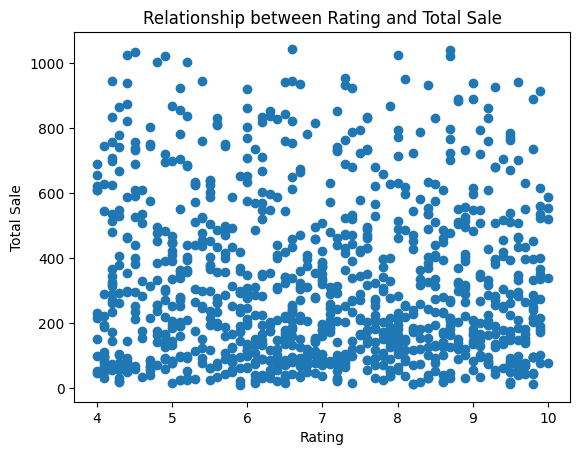

In [8]:
# Calculate the correlation between rating and total sale
corr = df['Rating'].corr(df['Total'])

# Plot a scatter plot to visualize the relationship between rating and total sale
import matplotlib.pyplot as plt
plt.scatter(df['Rating'], df['Total'])
plt.xlabel('Rating')
plt.ylabel('Total Sale')
plt.title('Relationship between Rating and Total Sale')
plt.show()

In [9]:
df.sketch.howto("Analyze the relationship between city and Gender")

In [10]:
# Get the counts of each gender in each city
city_gender_counts = df.groupby(['City', 'Gender']).size().reset_index(name='counts')

# Get the total counts of each city
city_total_counts = df.groupby('City').size().reset_index(name='total_counts')

# Merge the two dataframes to get the percentage of each gender in each city
city_gender_percentage = pd.merge(city_gender_counts, city_total_counts, on='City')
city_gender_percentage['percentage'] = city_gender_percentage['counts'] / city_gender_percentage['total_counts'] * 100

# Print the results
print(city_gender_percentage)

        City  Gender  counts  total_counts  percentage
0   Mandalay  Female     162           332   48.795181
1   Mandalay    Male     170           332   51.204819
2  Naypyitaw  Female     178           328   54.268293
3  Naypyitaw    Male     150           328   45.731707
4     Yangon  Female     161           340   47.352941
5     Yangon    Male     179           340   52.647059


In [11]:
df.sketch.howto("Create a plot to show sales by gender and by city")

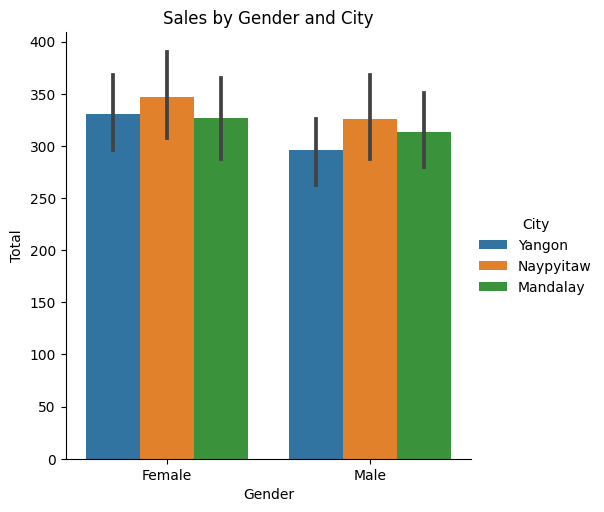

In [12]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# create a plot to show sales by gender and by city
sns.catplot(x="Gender", y="Total", hue="City", kind="bar", data=df)
plt.title('Sales by Gender and City')
plt.show()

In [13]:
df.sketch.howto("Create a plot to show sales by month")

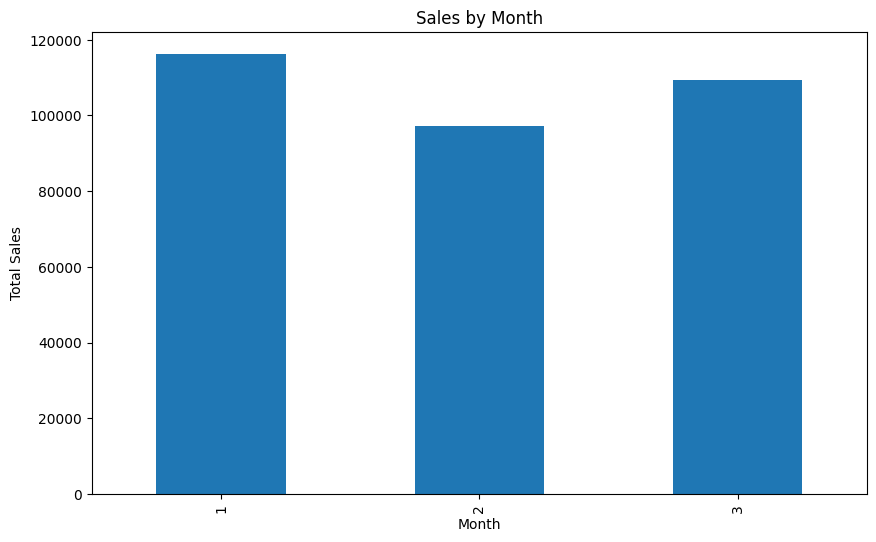

In [14]:
# Create a new column for the month from the Date column
df['Month'] = pd.DatetimeIndex(df['Date']).month

# Create a plot to show sales by month
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sales_by_month = df.groupby('Month')['Total'].sum()
sales_by_month.plot(kind='bar')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [15]:
df.sketch.howto("Using Plotly, plot the total sales by each hour of the day")

In [17]:
import plotly.express as px

# Create a dataframe with the total sales by each hour of the day
df_hourly = df.groupby(df['Time'].str[:2]).agg({'Total': 'sum'}).reset_index()

# Plot the total sales by each hour of the day using Plotly
fig = px.bar(df_hourly, x='Time', y='Total', title='Total Sales by Hour of the Day')
fig.show()